<a href="https://colab.research.google.com/github/shallynagfase9/Decision-trees-Support-vector-machines/blob/main/Support_Vector_Machines_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. What is the mathematical formula for a linear SVM?

In [ ]:

"""
The primal optimization problem for a linear SVM is:

min 𝑤,b,𝜉 1/2||w||^2 + C∑i=1m𝜉i

"""
​


Q2. What is the objective function of a linear SVM?

In [ ]:
"""
The objective function of a linear Support Vector Machine (SVM) aims to find the hyperplane that best separates the two classes by maximizing the margin between them while allowing for some misclassification controlled by a regularization parameter.

"""

Q3. What is the kernel trick in SVM?

In [ ]:
"""

The kernel trick in Support Vector Machines (SVM) is a technique that allows the SVM to operate in a high-dimensional, implicit feature space without explicitly computing the coordinates of the data in that space. Instead, it uses kernel functions to compute the inner products between the images of all pairs of data in the feature space.

"""

Q4. What is the role of support vectors in SVM Explain with example

In [ ]:
"""
Support vectors play a crucial role in the functioning of Support Vector Machines (SVM). They are the data points that lie closest to the decision boundary (hyperplane) and directly influence its position and orientation.

"""

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?

In [ ]:
"""
Hyperplane: In a linear SVM, the hyperplane is the decision boundary that separates the classes. Mathematically, it's represented by the equation
w . x + b = 0.

Marginal Planes: These are the planes parallel to the hyperplane and at a distance equal to the margin from the hyperplane. They are represented by
w .⋅x + b = ±1.

In a hard margin SVM, the goal is to find a hyperplane that perfectly separates the data points of different classes, assuming the data is linearly separable and there are no outliers.
In a soft margin SVM, the goal is to find a hyperplane that best separates the data while allowing some misclassifications.

Hard Margin SVM Example-
- Data points are perfectly separated.
- No points within the margin.

Soft Margin SVM Example-
- Data points are not perfectly separated.
- Some points lie within the margin, allowing for some misclassification.

"""

Q6. SVM Implementation through Iris dataset.
~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.

Accuracy: 0.80


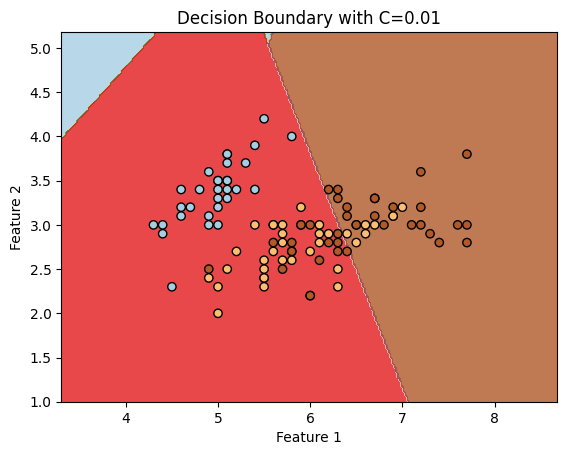

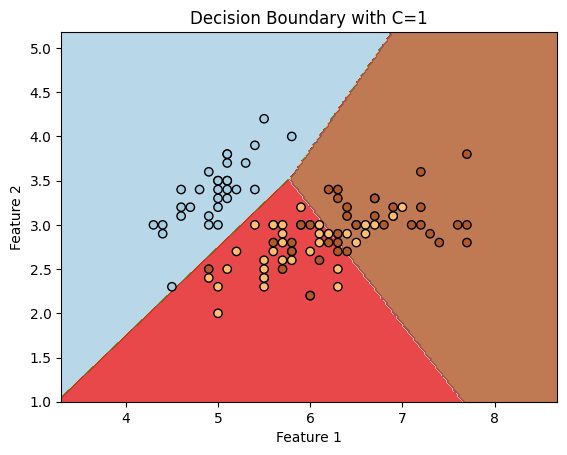

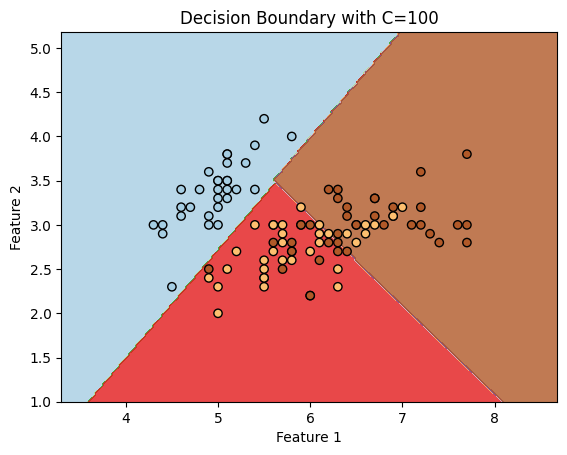

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear SVM classifier on the training set
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = svc.predict(X_test)

# Compute the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Function to plot the decision boundaries
def plot_decision_boundaries(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Plot decision boundaries for different values of C
C_values = [0.01, 1, 100]
for C in C_values:
    svc = SVC(kernel='linear', C=C)
    svc.fit(X_train, y_train)
    plot_decision_boundaries(X_train, y_train, svc, f'Decision Boundary with C={C}')
